In [102]:
import matplotlib.pyplot as plt
import pandas as pd
df = pd.read_csv("500rate.csv")
df.head()

,RecvTime,oldRecvTime,SendTime,oldSendTime
0,52437,52437,52204,52189
1,52437,52437,52204,52204
2,52437,52437,52204,52204
3,52437,52437,52204,52204
4,52437,52437,52204,52204


In [103]:
d = df["RecvTime"] - df["oldRecvTime"] - (df["SendTime"] - df["oldSendTime"])
df['diff']= d
df.head()

,RecvTime,oldRecvTime,SendTime,oldSendTime,diff
0,52437,52437,52204,52189,-15
1,52437,52437,52204,52204,0
2,52437,52437,52204,52204,0
3,52437,52437,52204,52204,0
4,52437,52437,52204,52204,0


In [104]:
preFilterDF = { "RecvTime": [], 
                "oldRecvTime":[],
                "SendTime":[],
                "oldSendTime":[],
                "diff":[]}


In [105]:
tR = df["RecvTime"][0]
#print(abs(tR - tR -2))
for index,line in df.iterrows():
    curR = int(line["RecvTime"])
    diff = int(line["diff"])
    if ( (abs(curR - tR) >= 5) or (diff < 0) ):
        tR = curR
        
        preFilterDF["RecvTime"].append(line["RecvTime"])
        preFilterDF["oldRecvTime"].append(line["oldRecvTime"])
        preFilterDF["SendTime"].append(line["SendTime"])
        preFilterDF["oldSendTime"].append(line["oldSendTime"])
        preFilterDF["diff"].append(line["diff"])
    
    

In [106]:
preFilter = pd.DataFrame(preFilterDF)

In [107]:
preFilter.head()

,RecvTime,oldRecvTime,SendTime,oldSendTime,diff
0,52437,52437,52204,52189,-15
1,52437,52437,52219,52204,-15
2,52437,52437,52236,52219,-17
3,52437,52437,52255,52236,-19
4,52437,52437,52268,52255,-13


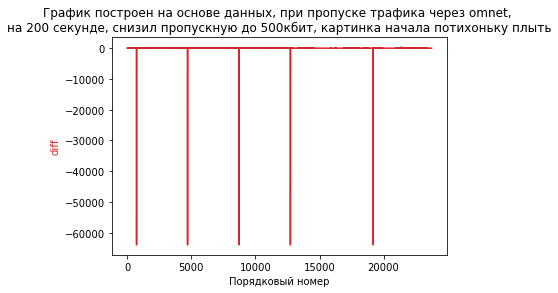

In [108]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Порядковый номер')
ax1.set_ylabel('diff', color=color)  # we already handled the x-label with ax1
ax1.plot(preFilter["diff"],color=color)
plt.title("""График построен на основе данных, при пропуске трафика через omnet, 
на 200 секунде, снизил пропускную до 500кбит, картинка начала потихоньку плыть""")
plt.show()